In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_excel('photoelasticity.xlsx')
data

,Fringe Order,Fringe Location (in px),Fringe Location (in mm),Theoritical stress value (MPa),Experimental stress value (MPa)
0,3,593,10.8983,11.034977,7.2
1,2,763,9.1504,9.265157,4.8
2,1,959,7.1353,7.224785,2.4
3,0,1403,2.5703,2.602535,0.0
4,-1,1995,-3.5162,-3.560297,-2.4
5,-2,2219,-5.8192,-5.892180,-4.8
6,-3,2327,-6.9296,-7.016505,-7.2
7,-4,2439,-8.0811,-8.182446,-9.6


In [3]:
m,b = np.polyfit(data['Fringe Location (in mm)'],data['Experimental stress value (MPa)'],1)
a,c = np.polyfit(data['Fringe Location (in mm)'],data['Theoritical stress value (MPa)'],1)

In [4]:
print(f"m = {m}\na = {a}")

m = 0.7449749988652921
a = 1.0125411689933173


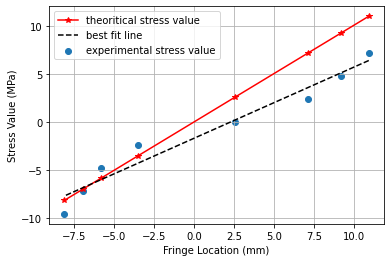

In [5]:
plt.grid();
plt.xlabel('Fringe Location (mm)');
plt.ylabel('Stress Value (MPa)');
plt.plot(data['Fringe Location (in mm)'],data['Theoritical stress value (MPa)'],'-*r')
plt.plot(data['Fringe Location (in mm)'],m*data['Fringe Location (in mm)']+b,"--k")
plt.scatter(x=data['Fringe Location (in mm)'],y=data['Experimental stress value (MPa)']);
plt.legend(['theoritical stress value','best fit line','experimental stress value']);

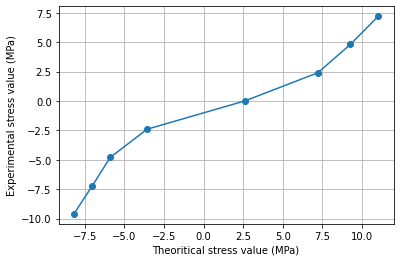

In [6]:
plt.grid();
plt.plot(data['Theoritical stress value (MPa)'],data['Experimental stress value (MPa)'],'-o');
plt.xlabel('Theoritical stress value (MPa)');
plt.ylabel('Experimental stress value (MPa)');

In [14]:
meanTh = np.mean(np.abs(data['Theoritical stress value (MPa)']))
meanExp = np.mean(np.abs(data['Experimental stress value (MPa)']))
(meanTh,meanExp)

(6.847360282375755, 4.8)

In [15]:
def error(expdata,thdata):
    err = np.abs(((expdata-thdata)/(meanTh))*100)
    return err

In [16]:
err_data = error(data['Experimental stress value (MPa)'],data['Theoritical stress value (MPa)'])
col = ['Fringe Order','error']

In [20]:
err_df = pd.DataFrame({
    'Fringe Order' : data['Fringe Order'],
    '% error' : err_data,
}
)

In [21]:
err_df

,Fringe Order,% error
0,3,56.006655
1,2,65.209899
2,1,70.461971
3,0,38.007852
4,-1,16.945176
5,-2,15.950374
6,-3,2.679788
7,-4,20.702190


In [22]:
np.mean(err_df['% error'])

35.745488043379794

KeyError: 'error'

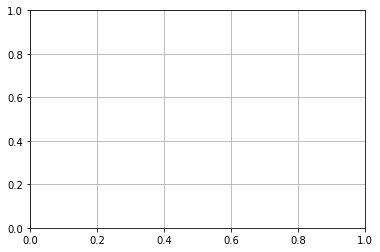

In [23]:
plt.grid();
plt.plot(data['Fringe Location (in mm)'],err_df['% error'],'o-k');
plt.xlabel('Fringe Location (in mm)');
plt.ylabel('% Error');
plt.legend(['% error']);

In [13]:
np.mean(err_df['error'])

40.099054704993506